## **Setup**

In [1]:
!pip install citipy

In [18]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ImportError: DLL load failed: The specified procedure could not be found.

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

## **Perform API Calls**

*   Perform a weather check on each city using a series of successive API calls.
*   Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# set lists for the dataframe
city_name = []
lat = []
lng = []
max_temp = []
clouds = []
humidity = []
wind_speed = []
country = []
date = []

# set initial count quantities for organization
count_one = 0
set_one = 1

print("Beginning Data Retrieval")    
print("-----------------------------")
# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if count_one > 49:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | dunedin
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | isangel
Processing Record 5 of Set 1 | mattru
Processing Record 6 of Set 1 | brejo da madre de deus
City not found. Skipping...
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | olafsvik
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | kjollefjord
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | hovd
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | ondjiva
Processing Record 17 of Set 1 | yashkul
Processing Record 18 of Set 1 | esperance
City not found. Skipping...
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | alta floresta
Processing Record 21 of Set 1 | regina
Processing Record 22 of Set 1 

Processing Record 35 of Set 4 | kleive
Processing Record 36 of Set 4 | severo-kurilsk
Processing Record 37 of Set 4 | boyolangu
Processing Record 38 of Set 4 | shimanovsk
Processing Record 39 of Set 4 | port macquarie
City not found. Skipping...
Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | cap malheureux
Processing Record 42 of Set 4 | sistranda
Processing Record 43 of Set 4 | clyde river
Processing Record 44 of Set 4 | ocos
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | tombouctou
Processing Record 47 of Set 4 | kadoma
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | saint-philippe
Processing Record 50 of Set 4 | camargo
Processing Record 1 of Set 5 | martil
Processing Record 2 of Set 5 | husavik
Processing Record 3 of Set 5 | zonguldak
Processing Record 4 of Set 5 | sampit
Processing Record 5 of Set 5 | ust-kuyga
Processing Record 6 of Set 5 | half moon bay
Processing Record 7 of Set 5 | mahon
City not f

Processing Record 16 of Set 8 | nanortalik
Processing Record 17 of Set 8 | oktyabrskoye
Processing Record 18 of Set 8 | mandali
Processing Record 19 of Set 8 | gemena
Processing Record 20 of Set 8 | kununurra
Processing Record 21 of Set 8 | rumphi
City not found. Skipping...
Processing Record 22 of Set 8 | katherine
Processing Record 23 of Set 8 | bambous virieux
Processing Record 24 of Set 8 | sola
Processing Record 25 of Set 8 | mitchell
Processing Record 26 of Set 8 | kahului
Processing Record 27 of Set 8 | sabang
Processing Record 28 of Set 8 | guanica
Processing Record 29 of Set 8 | grand centre
Processing Record 30 of Set 8 | bathsheba
Processing Record 31 of Set 8 | gasa
Processing Record 32 of Set 8 | nikki
Processing Record 33 of Set 8 | komsomolskiy
Processing Record 34 of Set 8 | vestmannaeyjar
Processing Record 35 of Set 8 | balkhash
Processing Record 36 of Set 8 | otane
Processing Record 37 of Set 8 | wanning
Processing Record 38 of Set 8 | giresun
Processing Record 39 of 

Processing Record 46 of Set 11 | mirnyy
Processing Record 47 of Set 11 | moberly
Processing Record 48 of Set 11 | bur gabo
Processing Record 49 of Set 11 | kiama
City not found. Skipping...
Processing Record 50 of Set 11 | buribay
Processing Record 1 of Set 12 | abonnema
Processing Record 2 of Set 12 | udachnyy
Processing Record 3 of Set 12 | wenling
City not found. Skipping...
Processing Record 4 of Set 12 | north bend
Processing Record 5 of Set 12 | kieta
Processing Record 6 of Set 12 | rawlins
City not found. Skipping...
Processing Record 7 of Set 12 | comodoro rivadavia
Processing Record 8 of Set 12 | bilma
Processing Record 9 of Set 12 | namibe
Processing Record 10 of Set 12 | yuncheng
Processing Record 11 of Set 12 | bubaque
------------------------------
Data Retrieval Complete
------------------------------


## **Convert Raw Data to DataFrame**
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create dictionary to hold dataframe
weather_dict = {
    "City":city_name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date,}

In [7]:
#Create dataframe

weather_df = pd.DataFrame(weather_dict)

In [8]:
#Export to CSV

weather_df.to_csv(output_data_file)

PermissionError: [Errno 13] Permission denied: 'output_data/cities.csv'

In [9]:
#Show count

weather_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [10]:
#Display the dataframe

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dunedin,-45.87,170.50,59.25,52,72,17.87,NZ,1598750990
1,cape town,-36.41,-71.90,42.80,70,0,11.41,CL,1598750990
2,bredasdorp,-34.53,20.04,42.80,87,4,5.82,ZA,1598750990
3,isangel,-19.55,169.27,77.00,69,75,16.11,VU,1598750990
4,mattru,7.62,-11.83,72.52,97,100,3.15,SL,1598750991
...,...,...,...,...,...,...,...,...,...
556,comodoro rivadavia,-13.66,-59.79,78.60,33,2,4.38,BR,1598751131
557,bilma,18.69,12.92,85.53,53,49,19.44,NE,1598751131
558,namibe,-15.20,12.15,60.04,74,0,3.83,AO,1598751131
559,yuncheng,35.02,110.99,82.11,55,0,3.40,CN,1598751132


## **Inspect the data and remove the cities where the humidity > 100%.¶**
* Skip this step if there are no cities that have humidity > 100%.

In [11]:
high_humidity = weather_df.loc[weather_df["Humidity"] > 100, :]

print(high_humidity)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


## **Plotting the Data**
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

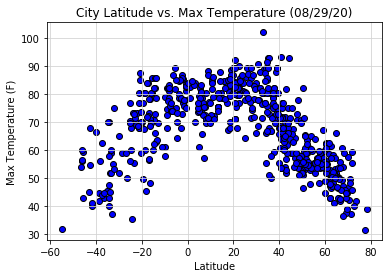

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (08/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig1.png")
plt.show()

### Latitude vs. Humidity Plot

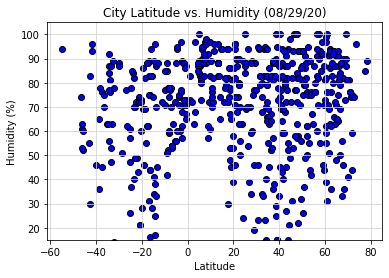

In [13]:

plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (08/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig2.png")
plt.show()

### Latitude vs. Cloudiness Plot

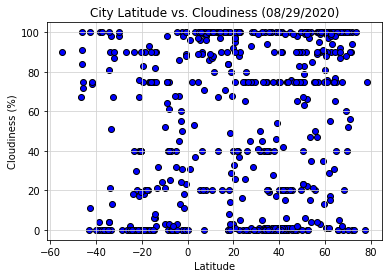

In [14]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (08/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig3.png")
plt.show()

### Latitude vs. Wind Speed Plot

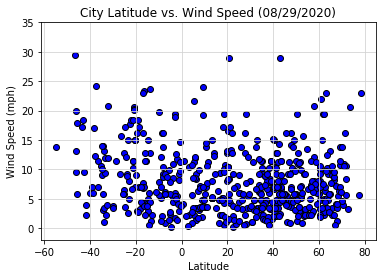

In [15]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (08/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,35)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig4.png")
plt.show()

## **Linear Regression**

In [16]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = weather_df.loc[weather_df["Lat"] > 0, :]
southern_df = weather_df.loc[weather_df["Lat"] < 0, :]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

NameError: name 'linregress' is not defined

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5247052223082558


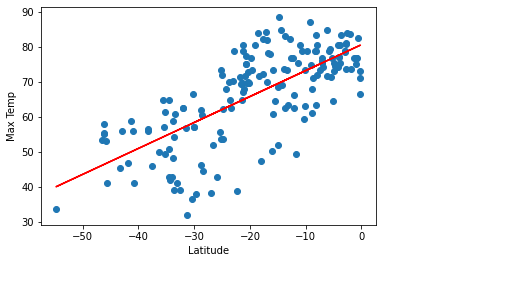

In [52]:
x_values2 = southern_df["Lat"]
y_values2 = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2,"r-")
plt.annotate(line_eq2,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [22]:
#There is a moderate negative correlation between Max Temp and Latitutude in the Northern Hemisphere and a moderate positive correlation between the two in the Southern Hemisphere. 


### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 2.7726860688383078e-05


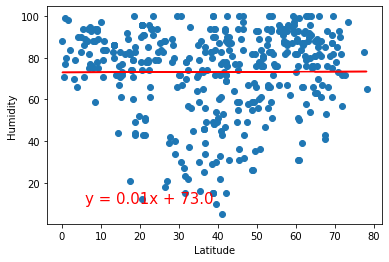

In [55]:
x_values3 = northern_df["Lat"]
y_values3 = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)
regress_values3 = x_values3 * slope + intercept
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values3,y_values3)
plt.plot(x_values3,regress_values3,"r-")
plt.annotate(line_eq3,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-squared is: 0.018769512815177553


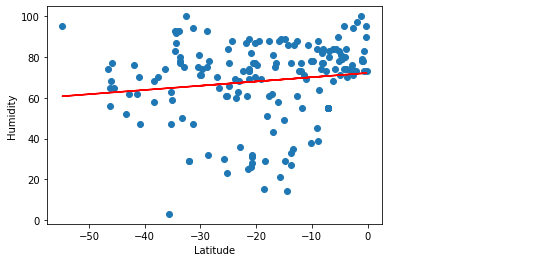

In [56]:
x_values4 = southern_df["Lat"]
y_values4 = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values4, y_values4)
regress_values4 = x_values4 * slope + intercept
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values4,y_values4)
plt.plot(x_values4,regress_values4,"r-")
plt.annotate(line_eq4,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [21]:
#There seems to be little to no correlation between Humidity and Latitude in both hemispheres.

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0002708737645012278


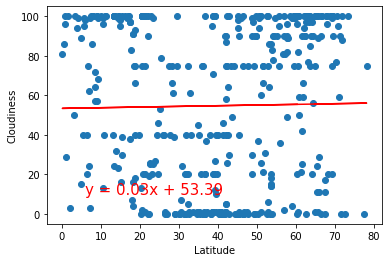

In [57]:
x_values5 = northern_df["Lat"]
y_values5 = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values5, y_values5)
regress_values5 = x_values5 * slope + intercept
line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values5,y_values5)
plt.plot(x_values5,regress_values5,"r-")
plt.annotate(line_eq5,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0006742716865119821


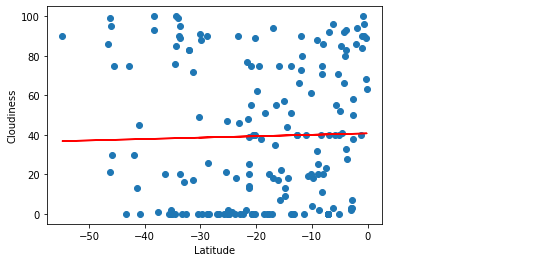

In [58]:
x_values6 = southern_df["Lat"]
y_values6 = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values6, y_values6)
regress_values6 = x_values6 * slope + intercept
line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values6,y_values6)
plt.plot(x_values6,regress_values6,"r-")
plt.annotate(line_eq6,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [20]:
#There seems to be little to no correlation between Cloudiness and Latitude in both hemispheres. 

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00046927357340637043


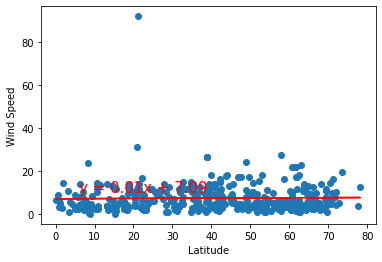

In [59]:
x_values7 = northern_df["Lat"]
y_values7 = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values7, y_values7)
regress_values7 = x_values7 * slope + intercept
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values7,y_values7)
plt.plot(x_values7,regress_values7,"r-")
plt.annotate(line_eq7,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025316193481050818


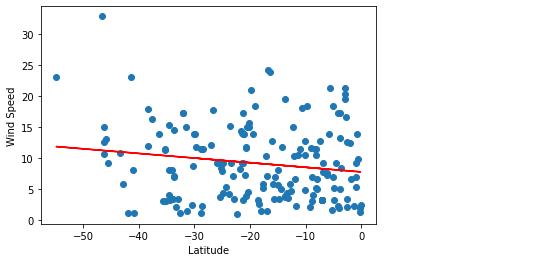

In [60]:
x_values8 = southern_df["Lat"]
y_values8 = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values8, y_values8)
regress_values8 = x_values8 * slope + intercept
line_eq8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values8,y_values8)
plt.plot(x_values8,regress_values8,"r-")
plt.annotate(line_eq8,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [19]:
#There seems to be little to no correlation between Cloudiness and Latitude in both hemispheres. The Windspeed overall in the Northern Hemisphere is fairly low. 